# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [95]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [96]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [97]:
#API Key
api_key = api_keys.api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

city_info = []

print("Begin Data Retrieval")

record_counter = 1
set_counter = 1

for i, city in enumerate(cities):
    
    if (i % 50 == 0 and i >= 50): 
        set_counter += 1
        record_counter = 0
    
    city_url = url + "&q=" + city
    
    print("Processing Record %s of Set %s | %s" % (record_counter, set_counter, city))
    
    record_counter += 1
    
    try:
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        city_info.append({"City" : city, 
                         "Lat" : city_lat, 
                         "Lng" : city_lng, 
                         "Max Temp" : city_max_temp, 
                         "Humidity" : city_humidity, 
                         "Cloudiness" : city_clouds, 
                         "Wind Speed" : city_wind, 
                         "Country" : city_country})
        
    
    except: 
        print("City not found. Skipping...")
        pass

print("Data Complete")
                     

Begin Data Retrieval
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | turukhansk
Processing Record 3 of Set 1 | baykit
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | ola
Processing Record 6 of Set 1 | anadyr
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | hofn
Processing Record 10 of Set 1 | mahebourg
Processing Record 11 of Set 1 | vao
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | ajdabiya
Processing Record 14 of Set 1 | castro
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | kalmunai
Processing Record 19 of Set 1 | mitu
Processing Record 20 of Set 1 | port blair
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | faanui
Processing Record 23 of Set 1 | mitsamiouli
Processing Record 24 of Set 1 | victoria
Processing Record 25 of Set 1 | h

Processing Record 39 of Set 4 | meyungs
City not found. Skipping...
Processing Record 40 of Set 4 | barrow
Processing Record 41 of Set 4 | nizhnyaya tavda
Processing Record 42 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 43 of Set 4 | trairi
Processing Record 44 of Set 4 | laguna
Processing Record 45 of Set 4 | saint anthony
Processing Record 46 of Set 4 | sechura
Processing Record 47 of Set 4 | dongsheng
Processing Record 48 of Set 4 | medea
Processing Record 49 of Set 4 | saint-georges
Processing Record 0 of Set 5 | flagstaff
Processing Record 1 of Set 5 | maghama
City not found. Skipping...
Processing Record 2 of Set 5 | panguna
Processing Record 3 of Set 5 | suntar
Processing Record 4 of Set 5 | borkenes
Processing Record 5 of Set 5 | samarinda
Processing Record 6 of Set 5 | amahai
Processing Record 7 of Set 5 | kapoeta
City not found. Skipping...
Processing Record 8 of Set 5 | hamilton
Processing Record 9 of Set 5 | cap malheureux
Processing Record 10 of 

Processing Record 23 of Set 8 | ambon
Processing Record 24 of Set 8 | sanary-sur-mer
Processing Record 25 of Set 8 | uribia
Processing Record 26 of Set 8 | taywarah
Processing Record 27 of Set 8 | sorland
Processing Record 28 of Set 8 | ambunti
Processing Record 29 of Set 8 | biak
Processing Record 30 of Set 8 | pombas
Processing Record 31 of Set 8 | brae
Processing Record 32 of Set 8 | kavaratti
Processing Record 33 of Set 8 | kikwit
Processing Record 34 of Set 8 | okha
Processing Record 35 of Set 8 | syasstroy
Processing Record 36 of Set 8 | shuangcheng
Processing Record 37 of Set 8 | normandin
Processing Record 38 of Set 8 | ketchenery
City not found. Skipping...
Processing Record 39 of Set 8 | salalah
Processing Record 40 of Set 8 | santa barbara
Processing Record 41 of Set 8 | coari
Processing Record 42 of Set 8 | lensk
Processing Record 43 of Set 8 | fomboni
Processing Record 44 of Set 8 | port augusta
Processing Record 45 of Set 8 | tiznit
Processing Record 46 of Set 8 | kaitang

Processing Record 7 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 8 of Set 12 | tromso
Processing Record 9 of Set 12 | sao joao da barra
Processing Record 10 of Set 12 | hasaki
Processing Record 11 of Set 12 | alyangula
Processing Record 12 of Set 12 | sampit
Processing Record 13 of Set 12 | sobolevo
Processing Record 14 of Set 12 | phak hai
Processing Record 15 of Set 12 | grimari
City not found. Skipping...
Processing Record 16 of Set 12 | tucuman
Processing Record 17 of Set 12 | atocha
Processing Record 18 of Set 12 | port lincoln
Processing Record 19 of Set 12 | los llanos de aridane
Processing Record 20 of Set 12 | russell
Processing Record 21 of Set 12 | loa janan
Processing Record 22 of Set 12 | san juan
Processing Record 23 of Set 12 | ust-tsilma
Processing Record 24 of Set 12 | lumut
Processing Record 25 of Set 12 | kungurtug
Processing Record 26 of Set 12 | si satchanalai
Processing Record 27 of Set 12 | boyolangu
Processing Record 28 of Set 12 | gonen
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [114]:
#convert to pandas df
city_info_pd = pd.DataFrame(city_info)

lats = city_info_pd["Lat"]
max_temps = city_info_pd["Max Temp"]
humidity = city_info_pd["Humidity"]
cloudiness = city_info_pd["Cloudiness"]
wind_speed = city_info_pd["Wind Speed"]

city_data_pd.to_csv(output_data_file, index_label="City_ID")

city_info_pd.count()

City          552
Cloudiness    552
Country       552
Humidity      552
Lat           552
Lng           552
Max Temp      552
Wind Speed    552
dtype: int64

In [99]:
city_info_pd.head()

,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,cape town,0,ZA,71,-33.93,18.42,53.60,3.36
1,turukhansk,56,RU,81,65.80,87.96,5.90,9.19
2,baykit,48,RU,74,61.68,96.39,10.98,9.19
3,mataura,92,NZ,95,-46.19,168.86,55.31,25.30
4,ola,92,RU,93,59.58,151.30,19.58,24.85


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

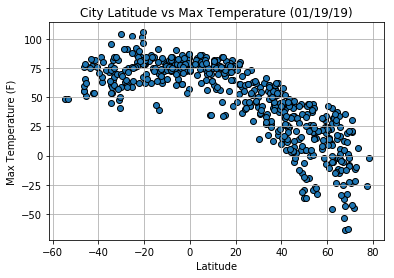

In [109]:
plt.scatter(lats, 
           max_temps, 
           edgecolor="black", marker="o", 
            label="Cities")

plt.title("City Latitude vs Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig1.png")

#### Latitude vs. Humidity Plot

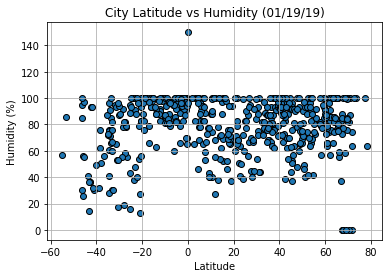

In [111]:
plt.scatter(lats, 
           humidity, 
           edgecolor="black", marker="o", 
            label="Cities")

plt.title("City Latitude vs Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig2.png")

#### Latitude vs. Cloudiness Plot

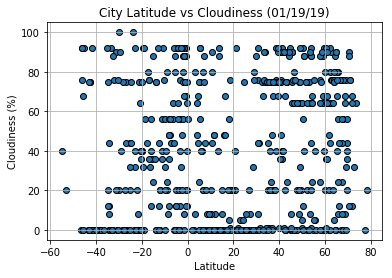

In [112]:
plt.scatter(lats, 
           cloudiness, 
           edgecolor="black", marker="o", 
            label="Cities")

plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig3.png")

#### Latitude vs. Wind Speed Plot

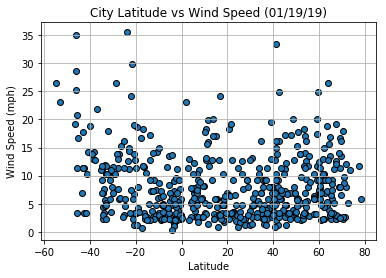

In [113]:
plt.scatter(lats, 
           wind_speed, 
           edgecolor="black", marker="o", 
            label="Cities")

plt.title("City Latitude vs Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig4.png")